<a href="https://colab.research.google.com/github/Bryanzdruls/Angular-CountryApp/blob/main/regresionlogistica_dos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib.pyplot as plt
from sklearn import datasets

In [ ]:
titanic = pd.read_csv("sample_data/titanic.csv")
titanic.describe()
#titanic.columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [ ]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
titanic=titanic.dropna()

In [ ]:
titanic.isna().sum()

,0
PassengerId,0
Survived,0
Pclass,0
Name,0
Sex,0
Age,0
SibSp,0
Parch,0
Ticket,0
Fare,0


In [ ]:
#subTitanic.dropna(subset=['Age'], inplace=True)
#titanic['Age'].isna().sum()
#subTitanic.describe()

In [ ]:
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000,183.000000
mean,455.366120,0.672131,1.191257,35.674426,0.464481,0.475410,78.682469
std,247.052476,0.470725,0.515187,15.643866,0.644159,0.754617,76.347843
min,2.000000,0.000000,1.000000,0.920000,0.000000,0.000000,0.000000
25%,263.500000,0.000000,1.000000,24.000000,0.000000,0.000000,29.700000
50%,457.000000,1.000000,1.000000,36.000000,0.000000,0.000000,57.000000
75%,676.000000,1.000000,1.000000,47.500000,1.000000,1.000000,90.000000
max,890.000000,1.000000,3.000000,80.000000,3.000000,4.000000,512.329200


<Axes: xlabel='Age', ylabel='Survived'>

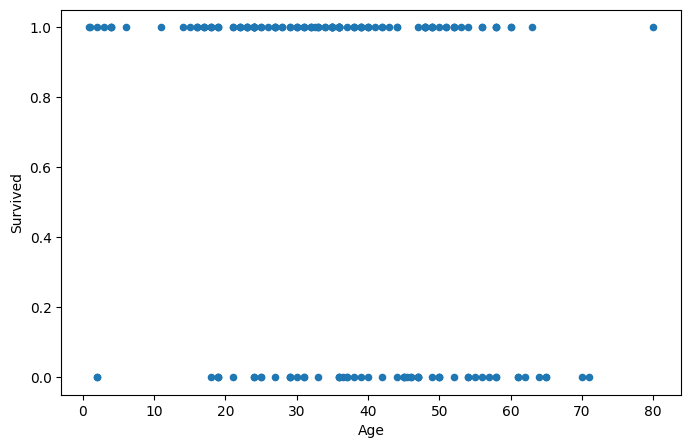

In [ ]:
titanic.plot(kind='scatter', x='Age', y='Survived', figsize=(8,5))

In [ ]:
x=titanic[['Age']]
y=titanic['Survived']
x_train, x_test, y_train, y_test =  train_test_split(x,y,test_size=0.3,random_state=0)

In [ ]:
laRegresion=LogisticRegression()
laRegresion.fit(x_train,y_train)

LogisticRegression()

In [ ]:
y_pred=laRegresion.predict([[5]])
y_pred[0]

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


1

In [ ]:
y_pred=laRegresion.predict(x_test)
x_test.count()

,0
Age,55


In [ ]:
matrixC = metrics.confusion_matrix(y_test,y_pred)
print(matrixC)

[[ 4  9]
 [ 6 36]]



```
[[TN  FP]
 [FN  TP]]
Verdaderos positivos (TP): casos donde el modelo predijo correctamente que la clase es positiva (1) y la clase verdadera es positiva.
Falsos positivos (FP): casos donde el modelo predijo incorrectamente que la clase es positiva (1) pero la clase verdadera es negativa (0).
Verdaderos negativos (TN): casos donde el modelo predijo correctamente que la clase es negativa (0) y la clase verdadera es negativa.
Falsos negativos (FN): casos donde el modelo predijo incorrectamente que la clase es negativa (0) pero la clase verdadera es positiva (1).
```

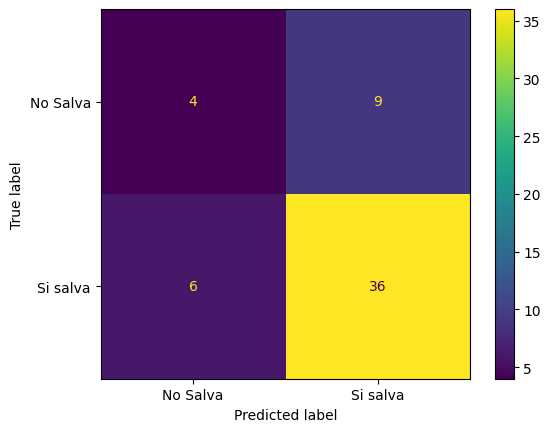

In [ ]:
#cm_display = metrics.ConfusionMatrixDisplay(matrixC)
cm_display = metrics.ConfusionMatrixDisplay(matrixC, display_labels = ['No Salva', 'Si salva'])
cm_display.plot()
plt.show()

**MÉTRICAS**


```
[[TN  FP]
 [FN  TP]]

Accuracy=(TP+TN)/total
Accuracy=(4+36)/55
Accuracy=0.72

Presicion=TP/TP+FP
Presicion=36/36+9
Presicion=0.8

Recall=TP/(TP+FN)
Recall=36/(36+6)
Recall=0.85

F1 Score = 2((presicion * recall)/(presicion + recall))
F1 Score = 2 ((0.8*0.85)/(0.8+0.85))
F1 Score = 0.82
```

In [ ]:
#Accurary (Exactitud)
print (metrics.accuracy_score(y_test,y_pred))

0.7272727272727273


In [ ]:
#Presicion (Presición)
print (metrics.precision_score(y_test,y_pred))

0.8


In [ ]:
#Recall (Exhaustividad)
print (metrics.recall_score(y_test,y_pred))

0.8571428571428571


In [ ]:
#F1 Score
print (metrics.f1_score(y_test,y_pred))

0.8275862068965517



---


**Ejemplo con Iris Dataset**

In [ ]:
datos = datasets.load_iris()
datos.target_names
print (datos.data[2],"->",datos.target[2],":",datos.target_names[2])
#print (datos.data[50],"->",datos.target[50])

iris_df = pd.DataFrame(data=datos.data, columns=datos.feature_names)
iris_df['class'] = datos.target
#iris_df.columns
iris_df.head()

[4.7 3.2 1.3 0.2] -> 0 : virginica


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [ ]:
#import seaborn as sns
#sns.pairplot(iris_df, hue='class')
#plt.show()

In [ ]:
iris_df.columns


Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'class'],
      dtype='object')

<Axes: xlabel='petal length (cm)', ylabel='class'>

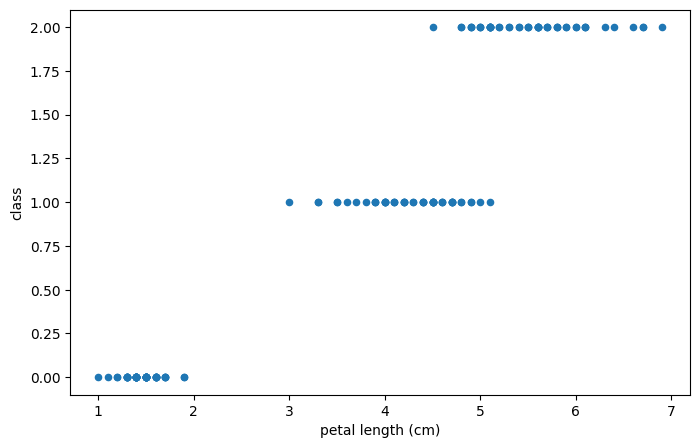

In [ ]:
iris_df.plot(kind='scatter', x='petal length (cm)', y='class', figsize=(8,5))

In [ ]:
X = iris_df[['petal length (cm)']]
y = iris_df['class']

In [ ]:
#X = iris_df[datos.feature_names]
#y = iris_df['class']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
log_reg = LogisticRegression(max_iter=200)

In [ ]:
log_reg.fit(X_train, y_train)

LogisticRegression(max_iter=200)

In [ ]:
valor= log_reg.predict([[1.5]])
#valor= log_reg.predict([[1.2,1.3,1.5,1.6]])
print(valor)

[0]


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


In [ ]:
y_pred = log_reg.predict(X_test)

In [ ]:
matrixC = metrics.confusion_matrix(y_test,y_pred)
print(y_test.count())
print(matrixC)

30
[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]


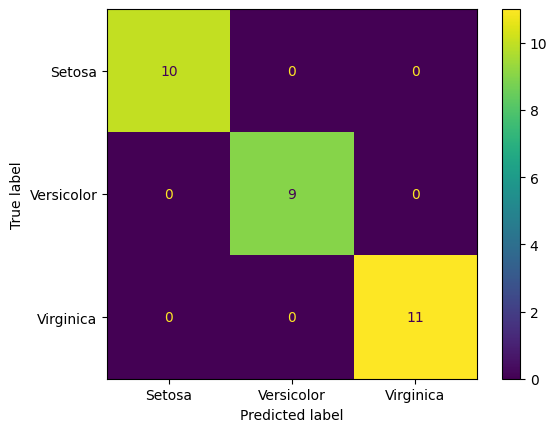

In [ ]:
cm_display = metrics.ConfusionMatrixDisplay(matrixC, display_labels = ['Setosa','Versicolor','Virginica'])
cm_display.plot()
plt.show()




---
**Ejemplo con dataset digits**




In [ ]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.data.shape

(1797, 64)

In [ ]:
digito=digits.data[110].reshape(8,8)
print(digito)

[[ 0.  0.  0. 10. 15.  0.  0.  0.]
 [ 0.  0. 11. 15.  3.  0.  0.  0.]
 [ 0.  7. 15.  4.  0.  0.  0.  0.]
 [ 0. 12. 11.  1.  3.  8.  2.  0.]
 [ 0.  4. 12. 15. 15. 16.  9.  0.]
 [ 0.  0.  0.  8. 16.  8.  2.  0.]
 [ 0.  0.  0. 10. 12.  0.  0.  0.]
 [ 0.  0.  0. 12.  9.  0.  0.  0.]]


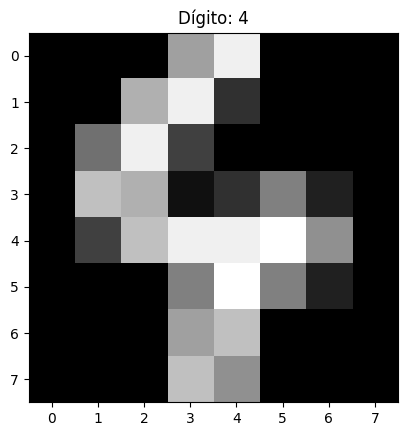

In [ ]:
plt.imshow(digito, cmap='gray')
plt.title(f'Dígito: {digits.target[110]}')
plt.show()

In [ ]:
Xtrain, Xtest, ytrain, ytest = train_test_split(digits.data, digits.target,test_size=0.2,random_state=0)

In [ ]:
logisticRegr = LogisticRegression(max_iter = 5000)
logisticRegr.fit(Xtrain, ytrain)

LogisticRegression(max_iter=5000)

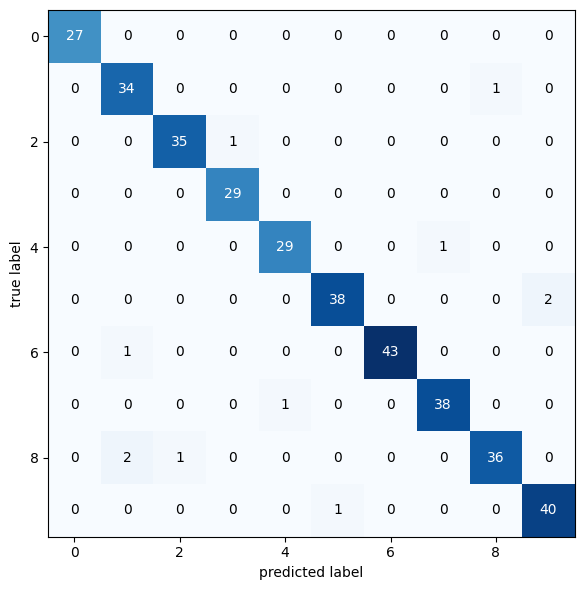

In [ ]:
from mlxtend.plotting import plot_confusion_matrix
import matplotlib.pyplot as pl

ypred = logisticRegr.predict(Xtest)
matriz = confusion_matrix(ytest,ypred)
plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()